# Лабораторная работа №4,  Компьютерная геометрия и геометрическое моделирование
- Ф.И.О: **Мерич Дорук Каймакджыоглу**.
- Ноиер студ. билета: **1032204917**.
- Группа: **НКНбд-01-20**.

***Задание №1***
Реализовать программу, которая будет двигать некоторый объект по плоскости, создавать изобра-
жение каждого положения объекта, а затем склеивать их в видео с помощью ffmpeg.
- Координаты вершин следует указывать в однородных координатах.
- На плоскости задана глобальная система координат.
- Объект может представлять из себя выпуклый или невыпуклый неправильный многоугольник. Можно легко нарисовать контур самолета/автомобиля/космического корабля, если предварительно вычертить его на бумаге в клетку размещая вершины в точках с целочисленными координатами. В крайнем случае можно использовать простой треугольник.
- Все координаты точек объекта задать в локальной системе координат, привязанной к центру объ- екта. Привязка к центру обязательна, иначе трудно будет реализовать вращения.
- Местоположение и ориентация на плоскости следует задавать матрицей положения. где⃗ 𝐨 = (𝐨 ∣ 1) = (𝑜𝑥, 𝑜𝑦 ∣ 1) — точка начала локальной системы координат, 𝑅 — матрица базисных векторов локальной системы координат. задает объект на плоскости, который находится в центре глобальной системы координат, в ис- ходном положении (никуда не повернут)
- Двигать объект по плоскости можно применяя матрицы трансляций и вращений, умножая на них исходную матрицу положений.
- Маршрут объекта, таким образом, задается последовательностью матриц, которые должны быть к нему применены, а вся траектория строится из трансляций и поворотов.

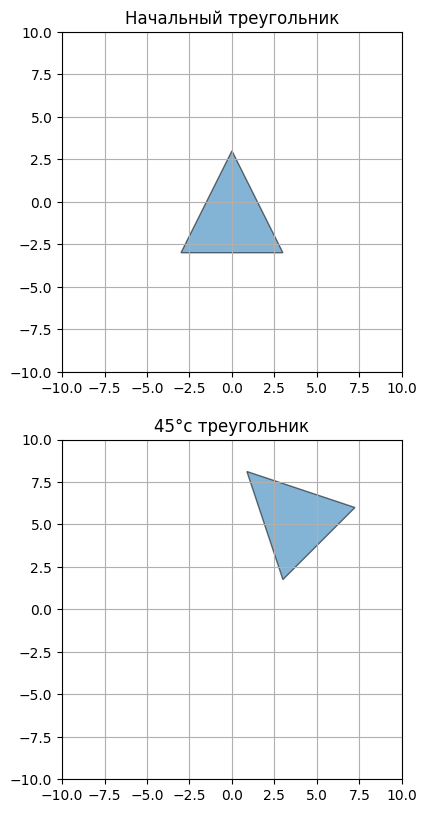

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import subprocess
from matplotlib.animation import FuncAnimation
from PIL import Image

tri = np.array([
    [-1, -1, 1],
    [1, -1, 1],
    [0, 1, 1]
])
M = np.array([
    [3, 0, 0],
    [0, 3, 0],
    [0, 0, 3]
])
M_T = np.transpose(M)
triM = np.dot(tri, M_T) 

fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(311)

ax.fill(triM[:, 0], triM[:, 1], edgecolor='black', alpha=0.55)
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.grid(True)
ax.set_title("Начальный треугольник")
ax.set_aspect('equal')

ax1 = fig.add_subplot(312)
translation_matrix = np.array([
    [1, 0, 1],
    [0, 1, 2],
    [0, 0, 1]
])
theta = 45 * (np.pi / 180)
rotation_matrix = np.array([
    [np.cos(theta), -np.sin(theta), 0],
    [np.sin(theta), np.cos(theta), 0],
    [0, 0, 1]
])
TR = np.dot(translation_matrix, rotation_matrix)
TR_T = np.transpose(TR)
T_tri = np.dot(triM, TR_T)

ax1.fill(T_tri[:, 0], T_tri[:, 1], edgecolor='black', alpha=0.55)
ax1.set_xlim([-10, 10])
ax1.set_ylim([-10, 10])
ax1.grid(True)
ax1.set_title("45°c треугольник")
ax1.set_aspect('equal')

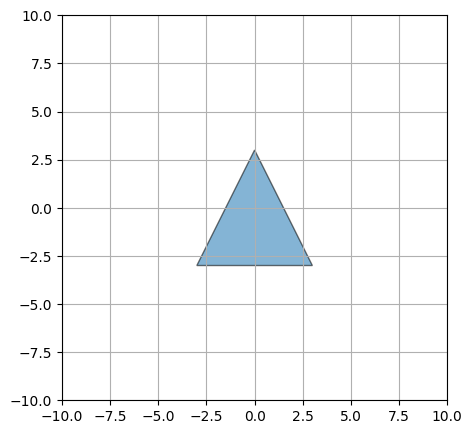

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

tri = np.array([
    [-1, -1, 1],
    [1, -1, 1],
    [0, 1, 1]
])
M = np.array([
    [3, 0, 0],
    [0, 3, 0],
    [0, 0, 3]
])
M_T = np.transpose(M)
triM = np.dot(tri, M_T) 

num_frames = 36
angle_per_frame = 360 / num_frames

fig, ax2 = plt.subplots(figsize=(5, 5))

def animate(frame):
    ax2.clear()
    theta = np.radians(frame * angle_per_frame)
    rotation_matrix = np.array([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta), np.cos(theta), 0],
        [0, 0, 1]
    ])
    rot_T = np.transpose(rotation_matrix)
    rot_TT = np.dot(triM, rot_T)
    save_polygon_frame(rot_TT, frame)
    ax2.fill(rot_TT[:, 0], rot_TT[:, 1], edgecolor='black', alpha=0.55)
    ax2.set_xlim(-10, 10)
    ax2.set_ylim(-10, 10)
    ax2.grid(True)
    ax2.set_aspect('equal')

ani = animation.FuncAnimation(fig, animate, frames=num_frames, repeat=False)

ani.save('triangle.gif', writer='pillow', fps=10)

In [76]:
for i in range(num_frames):
    file_name = f'frame_{i:03d}.png'
    os.remove(file_name)

***Задание №2*** Реализовать общую формулу для триметрических проекций и визуализировать куб со срезанной
вершиной (рис. 8) из примера [1, с. 156]. Должна быть возможность указать любые углы триметрической проекции. Если при написании программы применить объектно-ориентированный подход и создать объект многогранник с методами, позволяющими его вращать и транслировать, то выполнение всех последующих заданий сильно упроститься.

***Задание №3***
На основе предыдущей программы реализуйте деметрическую и изометрическую проекции.

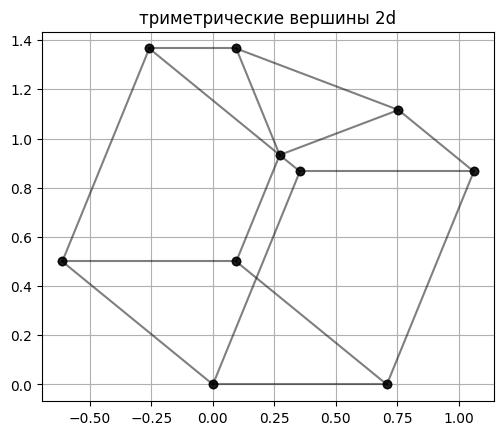

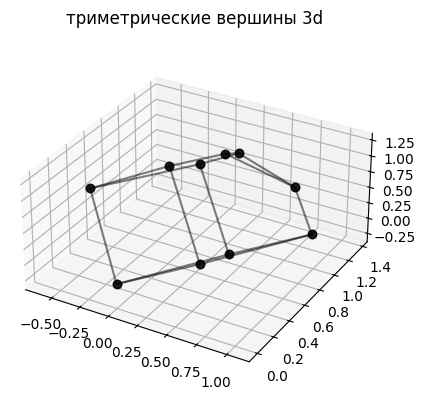

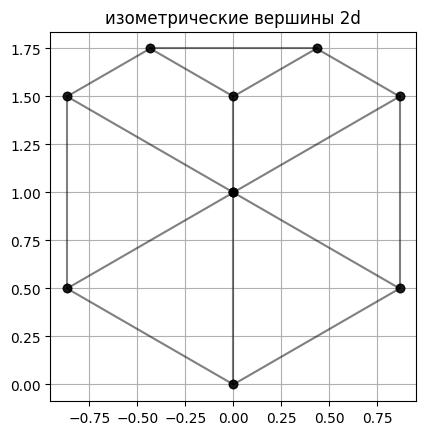

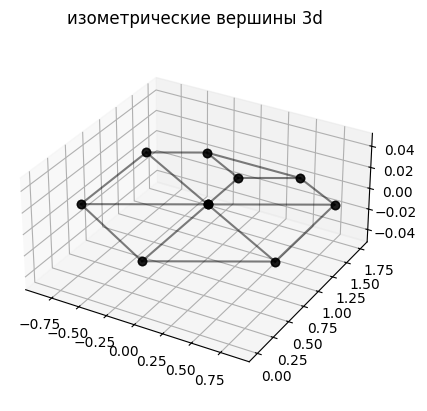

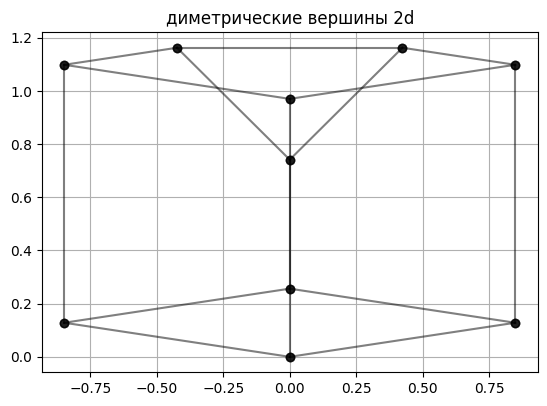

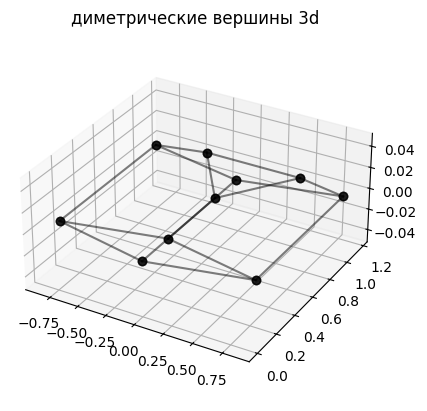

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

vertices = np.array([
    [0, 0, 1],    # 0
    [1, 0, 1],    # 1
    [1, 0.5, 1],  # 2
    [0.5, 1, 1],  # 3
    [0, 1, 1],    # 4
    [0, 0, 0],    # 5
    [1, 0, 0],    # 6
    [1, 1, 0],    # 7
    [0, 1, 0],    # 8
    [1, 1, 0.5]   # 9
])
edges = [
    [0, 1], [1, 2], [2, 3], [3, 4], [4, 0],  # top face
    [5, 6], [6, 7], [7, 8], [8, 5],  # bottom face
    [0, 5], [1, 6], [4, 8], [3, 9], [2, 9], [9, 7]  # vertical edges
]

def trimetric(vertices, alpha, beta, gamma):
    alpha = np.radians(alpha)
    beta = np.radians(beta)
    gamma = np.radians(gamma)
    M = np.array([
        [np.cos(beta), np.sin(alpha) * np.sin(beta), -np.sin(beta) * np.cos(alpha)],
        [0, np.cos(alpha), np.sin(alpha)],
        [np.sin(beta), -np.sin(alpha) * np.cos(beta), np.cos(alpha) * np.cos(beta)]
    ])
    transformed_vertices = np.dot(vertices, M.T)
    return transformed_vertices

def isometric(vertices):
    M = np.array([
        [np.sqrt(3) / 2, 0, -np.sqrt(3) / 2],
        [1 / 2, 1, 1 / 2],
        [0, 0, 0]
    ])
    transformed_vertices = np.dot(vertices, M.T)
    return transformed_vertices

def dimetric(vertices):
    alpha = np.radians(14)
    beta = np.radians(32)
    M = np.array([
        [np.cos(beta), 0, -np.cos(beta)],
        [np.sin(beta) * np.sin(alpha), np.cos(alpha), np.sin(beta) * np.sin(alpha)],
        [0, 0, 0]
    ])
    transformed_vertices = np.dot(vertices, M.T)
    return transformed_vertices

def plot(vertices, edges, title=""):
    fig, ax = plt.subplots()
    for edge in edges:
        points = vertices[edge].T
        ax.plot(points[0], points[1], color='black', marker='o', alpha=0.50)
    ax.set_aspect('equal')
    plt.title(title)
    plt.grid(True)
    plt.show()
    
def plot3d(vertices, edges,  title=""):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for edge in edges:
        points = vertices[edge].T
        ax.plot(points[0], points[1], points[2], color='black', marker='o', alpha=0.50)
    ax.set_box_aspect([1, 1, 0.5])
    plt.title(title)
    plt.show()

alpha = 30
beta = 45
gamma = 60

trimetric = trimetric(vertices, alpha, beta, gamma)
plot(trimetric, edges, "триметрические вершины 2d")
plot3d(trimetric, edges, "триметрические вершины 3d")

isometric = isometric(vertices)
plot(isometric, edges, "изометрические вершины 2d")
plot3d(isometric, edges, "изометрические вершины 3d")

dimetric = dimetric(vertices)
plot(dimetric, edges, "диметрические вершины 2d")
plot3d(dimetric, edges, "диметрические вершины 3d")

***Задание №4***
Используя изометрическую проекцию нарисовать «шахматное поле» и кубики на нем подобное тому, что нарисовано на рисунке 9. Дополнительные баллы ставятся за возможность легко (1-2 строками кода) добавлять новые кубики, ставить их на свободные плитки и друг на друга.

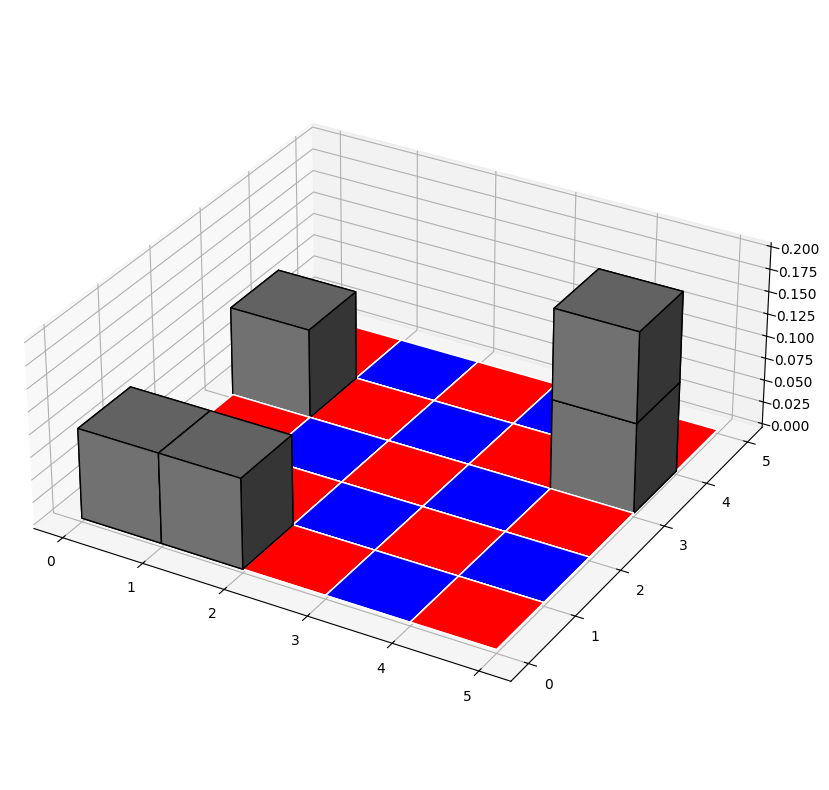

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def draw_isometric_chessboard(size=5, cell_size=1):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_box_aspect([1, 1, 0.4])
    heights = np.zeros((size, size))

    def draw_board():
        for i in range(size):
            for j in range(size):
                color = 'red' if (i + j) % 2 == 0 else 'blue'
                ax.bar3d(i * cell_size, j * cell_size, 0, cell_size, cell_size, 0, shade=False, color=color, edgecolor="white")

    def add_cube(position, height=0.1):
        x, y = position
        base_height = heights[x, y]
        color = 'grey'  
        ax.bar3d(x * cell_size, y * cell_size, base_height, cell_size, cell_size, height, shade=True, color=color, edgecolor="black")
        heights[x, y] += height

    draw_board()
    add_cube((0,0))
    add_cube((1,0))
    add_cube((0,3))
    add_cube((4,3))
    add_cube((4,3))

    plt.show()

draw_isometric_chessboard()
